In [24]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [25]:
df = pd.read_csv("wine_quality.csv")

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
df.shape

(3655, 12)

In [28]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']
X = df[features]
Y = df[target] 

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                   2.759482e+06
fixed acidity           2.471829e+00
volatile acidity        1.139483e+00
citric acid             1.162828e+00
residual sugar          1.245150e+01
chlorides               1.188589e+00
free sulfur dioxide     1.842750e+00
total sulfur dioxide    2.186918e+00
density                 2.410607e+01
pH                      2.075257e+00
sulphates               1.143016e+00
alcohol                 5.732190e+00
dtype: float64

In [32]:
#dropping features with vif>5
features = ['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates']
target = ['quality']
X = df[features]
Y = df[target]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [36]:
#Building the preliminary decision tree
from sklearn.metrics import accuracy_score
RF_training_labels = clf_dt.predict(X_train) 
RF_test_labels = clf_dt.predict(X_test)
print("train",accuracy_score(y_train, RF_training_labels))
print("test",accuracy_score(y_test, RF_test_labels))

train 1.0
test 0.7024070021881839


In [12]:
y_test.quality.value_counts()

6    207
5    159
Name: quality, dtype: int64

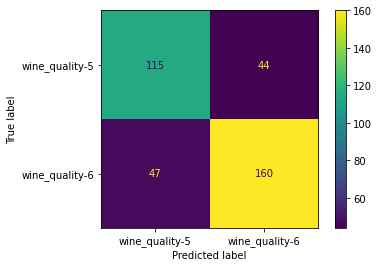

In [13]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["wine_quality-5", "wine_quality-6"])

In [14]:
#pruning by cost complexity
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

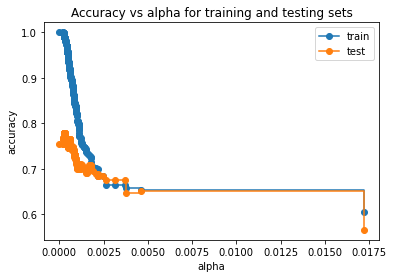

In [15]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
scores = pd.DataFrame({"train":train_scores,"test":test_scores,"alpha":ccp_alphas})
scores[200:250]

,train,test,alpha
200,0.916388,0.765027,0.000580
201,0.915780,0.762295,0.000582
202,0.914868,0.762295,0.000583
203,0.914260,0.762295,0.000584
204,0.911827,0.762295,0.000586
205,0.911523,0.759563,0.000590
206,0.911219,0.756831,0.000597
207,0.910003,0.759563,0.000608
208,0.907875,0.759563,0.000615
209,0.906659,0.756831,0.000621


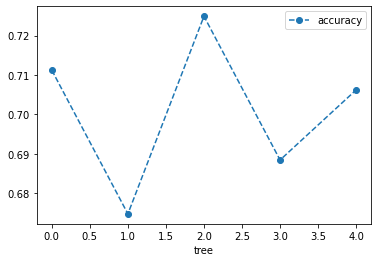

In [17]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.000625)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

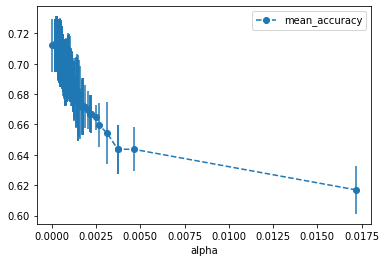

In [18]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [19]:
alpha_results[(alpha_results['alpha']>0.000600)
               &
              (alpha_results['alpha']<0.000625)]

,alpha,mean_accuracy,std
207,0.000608,0.699605,0.016577
208,0.000615,0.700518,0.018846
209,0.000621,0.700822,0.017668
210,0.000625,0.701127,0.017608


In [20]:
ideal_ccp_alpha = 0.000608

In [21]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

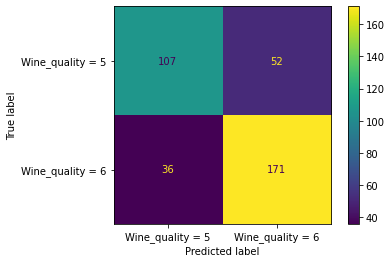

In [22]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Wine_quality = 5", "Wine_quality = 6"])

[Text(317.33803411989794, 396.9710526315789, 'volatile acidity <= 0.242\ngini = 0.478\nsamples = 3289\nvalue = [1298, 1991]\nclass = Wine_quality = 6'),
 Text(169.42844387755102, 375.5131578947368, 'sulphates <= 0.535\ngini = 0.394\nsamples = 1344\nvalue = [362, 982]\nclass = Wine_quality = 6'),
 Text(99.28698979591837, 354.05526315789473, 'total sulfur dioxide <= 123.5\ngini = 0.426\nsamples = 960\nvalue = [295, 665]\nclass = Wine_quality = 6'),
 Text(40.99591836734694, 332.59736842105264, 'free sulfur dioxide <= 21.5\ngini = 0.364\nsamples = 439\nvalue = [105, 334]\nclass = Wine_quality = 6'),
 Text(11.957142857142857, 311.13947368421054, 'citric acid <= 0.235\ngini = 0.486\nsamples = 147\nvalue = [61, 86]\nclass = Wine_quality = 6'),
 Text(8.540816326530612, 289.6815789473684, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = Wine_quality = 5'),
 Text(15.373469387755103, 289.6815789473684, 'chlorides <= 0.03\ngini = 0.469\nsamples = 136\nvalue = [51, 85]\nclass = Wine_quality = 

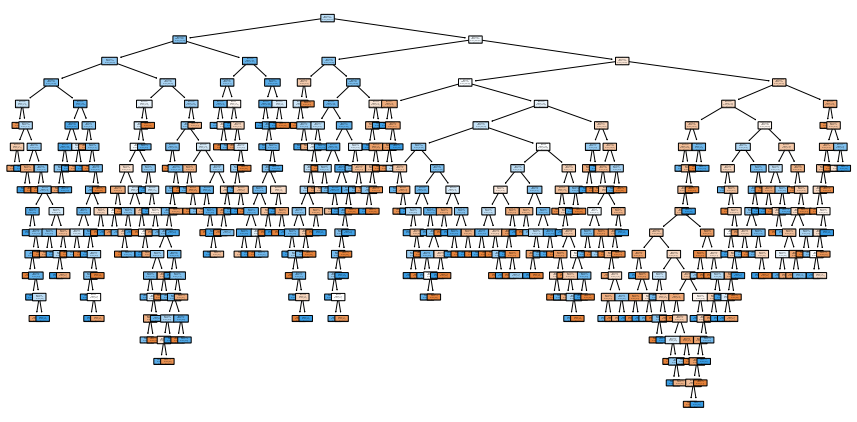

In [23]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["Wine_quality = 5", "Wine_quality = 6"], 
          feature_names=X.columns) 

In [203]:
RF_training_labels = clf_dt_pruned.predict(X_train) 
RF_test_labels = clf_dt_pruned.predict(X_test)
print("train",accuracy_score(y_train, RF_training_labels))
print("test",accuracy_score(y_test, RF_test_labels))

train 0.9103070842201277
test 0.7595628415300546


(       train      test
 1   0.394649  0.434426
 2   0.346914  0.349727
 3   0.337793  0.327869
 4   0.325935  0.311475
 5   0.297963  0.292350
 6   0.271815  0.295082
 7   0.229553  0.306011
 8   0.197628  0.281421
 9   0.167528  0.286885
 10  0.136516  0.289617
 11  0.106415  0.281421
 12  0.077835  0.259563
 13  0.055640  0.262295
 14  0.034965  0.254098
 15  0.020979  0.221311
 16  0.010033  0.248634
 17  0.004561  0.237705
 18  0.002128  0.245902
 19  0.000608  0.240437
 20  0.000608  0.226776
 21  0.000000  0.234973
 22  0.000000  0.237705
 23  0.000000  0.237705
 24  0.000000  0.240437
 25  0.000000  0.226776
 26  0.000000  0.226776
 27  0.000000  0.237705
 28  0.000000  0.237705
 29  0.000000  0.240437
 30  0.000000  0.248634
 31  0.000000  0.237705
 32  0.000000  0.240437
 33  0.000000  0.243169
 34  0.000000  0.234973,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fb9a912bc8>)

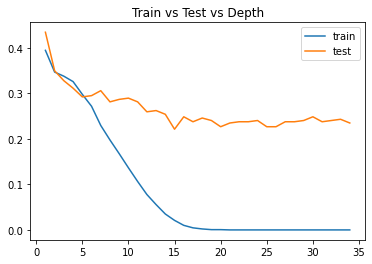

In [205]:
#TRAIN TEST SPLIT...Getting the max_depth at which the test error is minimum
df = pd.read_csv('wine_quality.csv')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates']
target = ['quality']
X = df[features]
Y = df[target]
j=1
train = []
test = []
while j<35:
    X1_train, X1_test, y1_train, y1_test = train_test_split(X,Y,random_state=42,test_size=0.1)
    model = DecisionTreeClassifier(max_depth=j)
    model.fit(X1_train,y1_train)
    RF_training_labels = model.predict(X1_train)
    RF_test_labels = model.predict(X1_test)
    train.append(accuracy_score(y1_train, RF_training_labels))
    test.append(accuracy_score(y1_test, RF_test_labels))
    j=j+1
    
accuracy_frame = pd.DataFrame({ "train" :train, "test":test })
accuracy_frame["train"] = 1-accuracy_frame["train"]
accuracy_frame["test"] = 1-accuracy_frame["test"]
accuracy_frame.index = np.arange(1, len(accuracy_frame)+1)
(accuracy_frame,accuracy_frame.plot.line(title='Train vs Test vs Depth'))


train 0.979933110367893
test 0.76775956284153


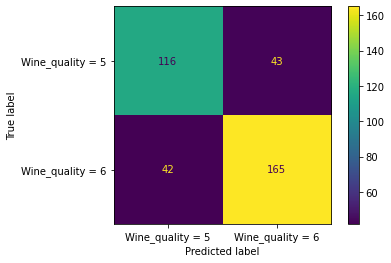

In [235]:
#tuning by max_depth
df = pd.read_csv('wine_quality.csv')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates']
target = ['quality']
X = df[features]
Y = df[target]
X1_train, X1_test, y1_train, y1_test = train_test_split(X,Y,random_state=42,test_size=0.1)
model = DecisionTreeClassifier(max_depth=15)
model.fit(X1_train,y1_train)
RF_training_labels = model.predict(X1_train) 
RF_test_labels = model.predict(X1_test)
plot_confusion_matrix(model, X1_test, y1_test, display_labels=["Wine_quality = 5", "Wine_quality = 6"])
from sklearn.metrics import accuracy_score
print("train",accuracy_score(y1_train, RF_training_labels))
print("test",accuracy_score(y1_test, RF_test_labels))